<a href="https://colab.research.google.com/github/HeadGaur/Kaggle2/blob/main/Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install --upgrade plotly==4.7.1.


     |████████████████████████████████| 11.5 MB 5.1 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
pip install mplcursors

     |████████████████████████████████| 88 kB 3.2 MB/s 
  Created wheel for mplcursors: filename=mplcursors-0.5.1-py3-none-any.whl size=20810 sha256=3e71253917ef13e9d2e003ba1a390679c3ac9f06f75ba67bbcae79a48b07ed50
  Stored in directory: /root/.cache/pip/wheels/ae/cd/13/09fe660e3e9d392c7e9b46f202369cd9c2b8dddfb47d5950ef
Successfully built mplcursors


In [ ]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import plot

Importing data

In [ ]:
df = pd.read_csv("kaggle_survey_2021_responses.csv")
df.head(n=10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.



,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool

Removing First Row -

In [ ]:
df.drop(index=df.index[0], 
        axis=0, 
        inplace=True)
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,Qlik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,Other,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DataRobot AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,MATLAB,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Gender Distribution

In [ ]:
gender_dict = {"Nonbinary": "Others", "Prefer not to say": "Others", "Prefer to self-describe": "Others"}
df["Q2"] = df["Q2"].replace(gender_dict)

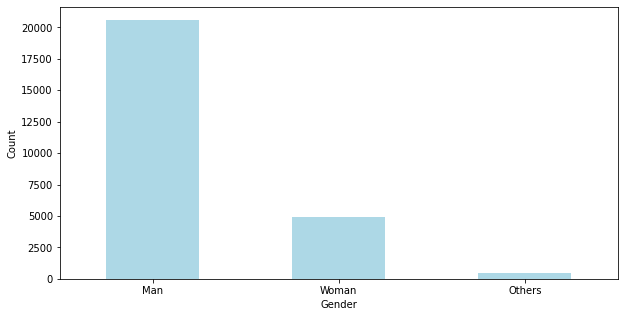

In [ ]:
fig = plt.figure(figsize=(10,5))
series = df["Q2"].value_counts()
ax = series.plot.bar(xlabel='Gender',ylabel='Count',rot=0, color='lightblue')

In [ ]:
gender_df = pd.DataFrame(df["Q2"].value_counts())
gender_df = gender_df.reset_index(drop=False)
gender_df.columns = ["Gender","Count"]
gender_df

,Gender,Count
0,Man,20598
1,Woman,4890
2,Others,485


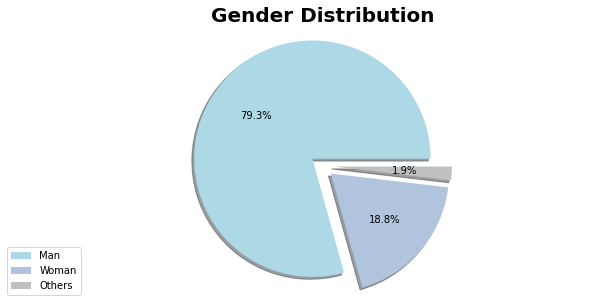

In [ ]:
fig = plt.figure(figsize=(10,5))
my_color = ['lightblue','lightsteelblue','silver']
my_explode = (0.1, 0.1, 0.1)
plt.pie(x=gender_df["Count"],autopct='%1.1f%%',colors=my_color,explode=my_explode,shadow=True)
plt.legend(gender_df["Gender"], loc="lower center", bbox_to_anchor=(0, 0))
plt.title('Gender Distribution',fontweight='bold',fontsize=20)
plt.axis('equal')
plt.show()

# Age Distribution

In [ ]:
age_df = pd.DataFrame(df["Q1"].value_counts())
age_df = age_df.reset_index(drop=False)
age_df.columns = ["Age","Count"]
age_df = age_df.sort_values(by='Age')
age_df

,Age,Count
1,18-21,4901
2,22-24,4694
0,25-29,4931
3,30-34,3441
4,35-39,2504
5,40-44,1890
6,45-49,1375
7,50-54,964
8,55-59,592
9,60-69,553


Text(0.5, 1.0, 'Age Distribution')

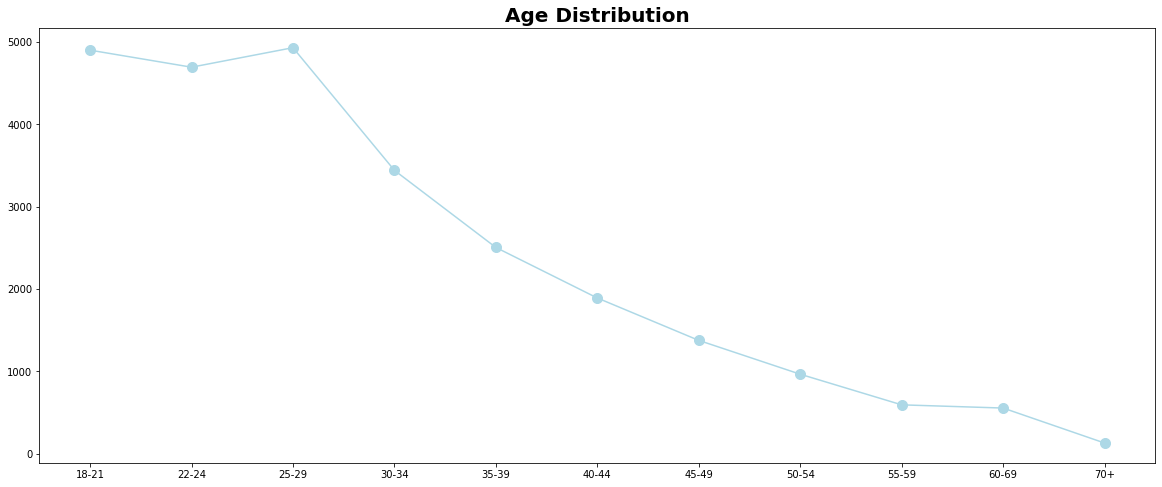

In [ ]:
fig = plt.figure(figsize=(20,8))
plt.plot(age_df["Age"],age_df["Count"],color="lightblue")
plt.scatter(age_df["Age"],age_df["Count"], color="lightblue",s = 100)
plt.title("Age Distribution",fontweight='bold',fontsize=20)

# Top kaggler Countries 

In [ ]:
fig = px.treemap(df, path=['Q3'], color='Q3')
fig.update_layout(margin = dict(t=60, l=15, r=15, b=15),
                  title_text="<b>Countries Distribution</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=20, color='rgb(5, 14, 48)'))
fig.show()

# Education Distribution

In [ ]:
by_male = df[df["Q2"]=="Man"]
tmp_male = by_male.Q4.value_counts()
male_labels = (np.array(tmp_male.index))
male_sizes = (np.array((tmp_male / tmp_male.sum())*100))

by_female = df[df["Q2"]=="Woman"]
tmp_female = by_female.Q4.value_counts()
female_labels = (np.array(tmp_female.index))
female_sizes = (np.array((tmp_female / tmp_female.sum())*100))

fig = make_subplots(rows=1, cols=2,  specs=[[{"type": "domain"}, {"type": "domain"}]])


male_data = go.Pie(labels=male_labels, values=male_sizes, hole=.8 , domain=dict(x=[0, 0.5]))
fig.add_trace(male_data,row=1, col=1)
fig.update_layout( title_text="Education Distribution",
    annotations=[dict(text='👨‍🎓         👩‍🎓', x=0.163, y=0.5, font_size=60, showarrow=False)])

female_data = go.Pie(labels=female_labels, values=female_sizes, hole=.8 , domain=dict(x=[0.5, 1]))
fig.add_trace(female_data,row=1, col=2)
fig.show()

# Machine Learning FrameWork

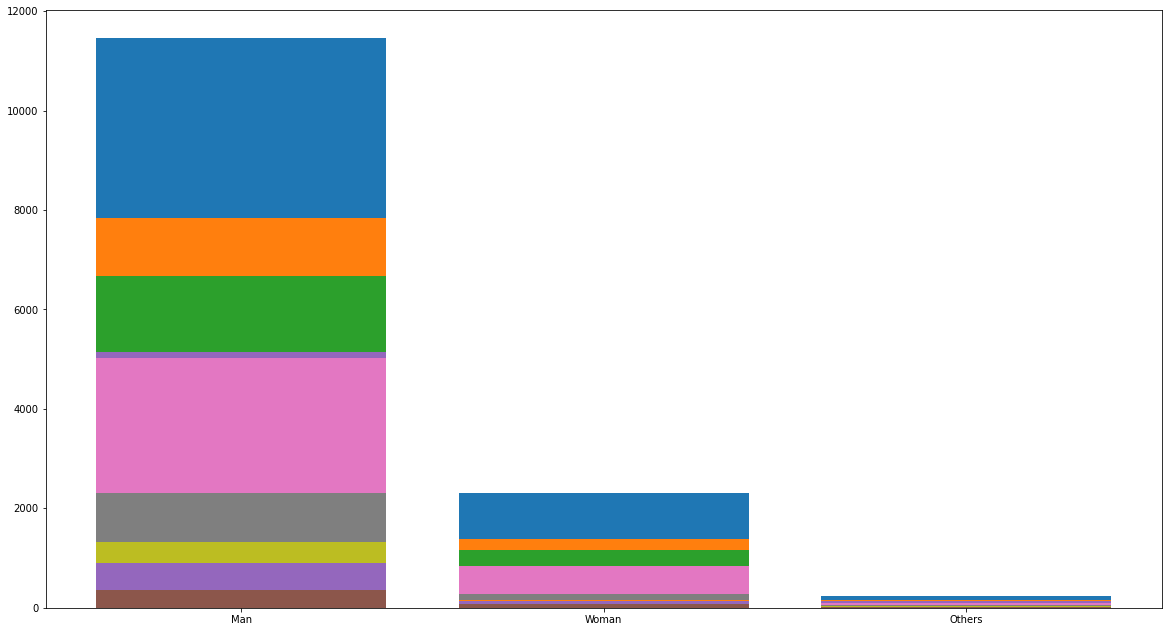

In [ ]:

ML = ["Q16_Part_1", "Q16_Part_2", "Q16_Part_3", "Q16_Part_4", "Q16_Part_5", "Q16_Part_6", "Q16_Part_7", "Q16_Part_8", 
             "Q16_Part_9", "Q16_Part_10", "Q16_Part_11", "Q16_Part_12", "Q16_Part_13", "Q16_Part_14", "Q16_Part_15", "Q16_OTHER"] 
mldf = df.groupby(["Q2"])[ML].count()
mldf.columns = ["Scikit-learn", "TensorFlow", "Keras", "PyTorch", "Fast.ai", "MXNet", "Xgboost", "LightGBM", "CatBoost",
                    "Prophet", "H2O 3", "Caret", "Tidymodels", "JAX", "None", "Other"]
mldf = mldf.reset_index(drop=False)
mldf = mldf.sort_values(by="TensorFlow",ascending=False)

fig = plt.figure(figsize=(20,11))
plt.bar(mldf["Q2"],height=mldf["Scikit-learn"],width=0.8)
plt.bar(mldf["Q2"],height=mldf["TensorFlow"],width=0.8)
plt.bar(mldf["Q2"],height=mldf["Keras"],width=0.8)
plt.bar(mldf["Q2"],height=mldf["Fast.ai"],width=0.8)
plt.bar(mldf["Q2"],height=mldf["PyTorch"],width=0.8)
plt.bar(mldf["Q2"],height=mldf["MXNet"],width=0.8)
plt.bar(mldf["Q2"],height=mldf["Xgboost"],width=0.8)
plt.bar(mldf["Q2"],height=mldf["LightGBM"],width=0.8)
plt.bar(mldf["Q2"],height=mldf["CatBoost"],width=0.8)
plt.bar(mldf["Q2"],height=mldf["Prophet"],width=0.8)
plt.bar(mldf["Q2"],height=mldf["H2O 3"],width=0.8)
plt.bar(mldf["Q2"],height=mldf["Caret"],width=0.8)
plt.bar(mldf["Q2"],height=mldf["Tidymodels"],width=0.8)
plt.bar(mldf["Q2"],height=mldf["JAX"],width=0.8)
plt.bar(mldf["Q2"],height=mldf["None"],width=0.8)
plt.bar(mldf["Q2"],height=mldf["Other"],width=0.8)

import mplcursors
mplcursors.cursor(hover=True)
plt.show()

In [ ]:
mldf


,Q2,Scikit-learn,TensorFlow,Keras,PyTorch,Fast.ai,MXNet,Xgboost,LightGBM,CatBoost,Prophet,H2O 3,Caret,Tidymodels,JAX,None,Other
0,Man,11454,7844,6679,5150,701,219,5031,2305,1325,684,419,826,549,152,900,348
2,Woman,2303,1374,1170,805,99,30,846,279,157,105,55,164,118,26,141,77
1,Others,230,153,126,133,24,3,97,51,30,11,14,19,11,12,19,14


In [ ]:
'''long_df = px.data.medals_long()
import plotly.express as px
count = mldf["Q2"].value_counts()
fig = px.bar(df1,
             color = "Q2", title = "Long-Form Input",barmode='stack')
fig.show()
'''

'long_df = px.data.medals_long()\nimport plotly.express as px\ncount = mldf["Q2"].value_counts()\nfig = px.bar(df1,\n             color = "Q2", title = "Long-Form Input",barmode=\'stack\')\nfig.show()\n'

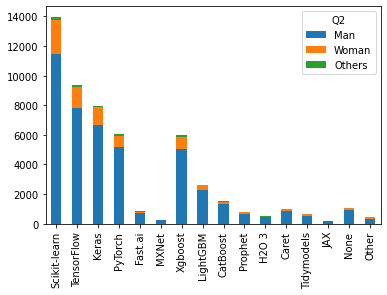

In [ ]:

df1 = mldf.set_index('Q2').transpose()
df1.plot(kind='bar',stacked = True)

In [ ]:
df1

Q2,Man,Woman,Others
Scikit-learn,11454,2303,230
TensorFlow,7844,1374,153
Keras,6679,1170,126
PyTorch,5150,805,133
Fast.ai,701,99,24
MXNet,219,30,3
Xgboost,5031,846,97
LightGBM,2305,279,51
CatBoost,1325,157,30
Prophet,684,105,11


In [29]:
df_stack=df1.groupby(['Q2']).size().reset_index()
df_stack['Percentage']=df.groupby(['index','Q2']).size().groupby(level=0).apply(lambda x:100 * x/float(x.sum())).values
df_stack.columns= ['index', 'Q2', 'Counts', 'Percentage']
df_stack['Percentage'] =  df_stack['Percentage'].map('{:,.2f}%'.format) 

KeyError: ignored

In [23]:
mldf


,Q2,Scikit-learn,TensorFlow,Keras,PyTorch,Fast.ai,MXNet,Xgboost,LightGBM,CatBoost,Prophet,H2O 3,Caret,Tidymodels,JAX,None,Other
0,Man,11454,7844,6679,5150,701,219,5031,2305,1325,684,419,826,549,152,900,348
2,Woman,2303,1374,1170,805,99,30,846,279,157,105,55,164,118,26,141,77
1,Others,230,153,126,133,24,3,97,51,30,11,14,19,11,12,19,14


In [26]:
df_stack

NameError: ignored